In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization

Dataset shape: (500, 450)
Missing values: 0


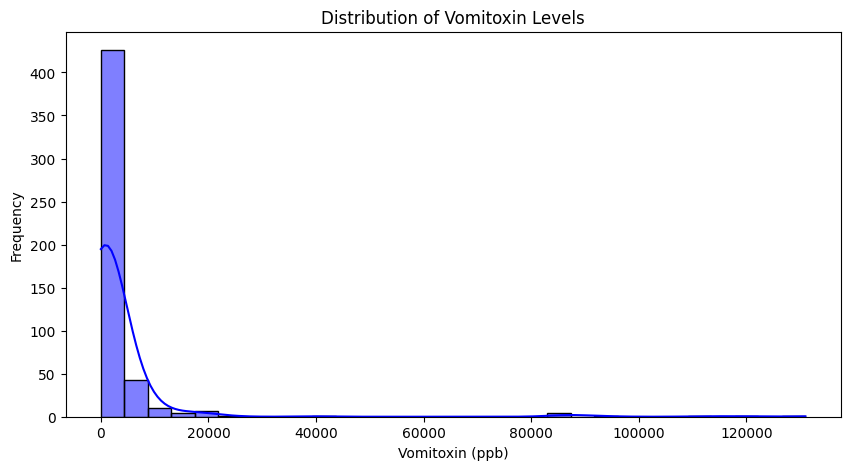

Explained variance by first 20 components: 0.9696744933258111


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\TASK-ML-INTERN.csv")

# Data exploration
print("Dataset shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

# Target distribution
plt.figure(figsize=(10,5))
sns.histplot(df["vomitoxin_ppb"], bins=30, kde=True, color="blue")
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()

# Feature-target split
X = df.drop(columns=["hsi_id", "vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance by first 20 components:", sum(pca.explained_variance_ratio_))

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [6]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf) ** 0.5)
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 2674.7867000000006
RMSE: 7119.358081053586
R² Score: 0.818678871557292


In [7]:
# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb) ** 0.5)
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Performance:
MAE: 1713.7253244781493
RMSE: 3257.266230358357
R² Score: 0.9620446279813979


In [8]:
# CNN Model
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(filters=128, kernel_size=9, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
cnn_model.summary()

# Train CNN
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=16, validation_data=(X_test_cnn, y_test))

# CNN Predictions
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Evaluate CNN
print("CNN Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_cnn))
print("RMSE:", mean_squared_error(y_test, y_pred_cnn) ** 0.5)
print("R² Score:", r2_score(y_test, y_pred_cnn))

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 128)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 64)          │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 6, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,761 (319.38 KB)

 Trainable params: 81,633 (318.88 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 168534112.0000 - val_loss: 298999136.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 349238336.0000 - val_loss: 298981472.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 109464440.0000 - val_loss: 298934400.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 124131200.0000 - val_loss: 298793952.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 88462512.0000 - val_loss: 298445504.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 126109544.0000 - val_loss: 297665856.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 120578992.0000 - val_loss: 296169376.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 150272176.0000 - val_loss: 293524864.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 181049168.0000 - val_loss: 289726784.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 122042392.0000 - val_loss: 28502

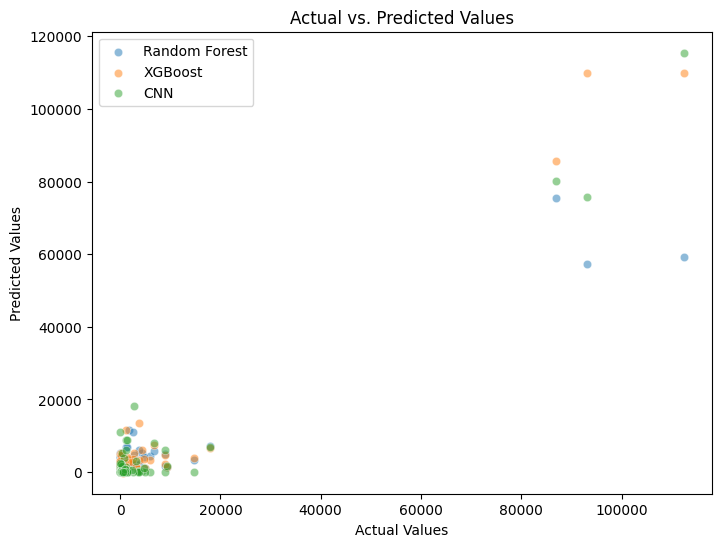

In [9]:
# Scatter plot of actual vs. predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_xgb, label="XGBoost", alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred_cnn.flatten(), label="CNN", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()
